In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201

x = tf.linspace(-2, 2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)


def f(x):
    return x * TRUE_W + TRUE_B


noise = tf.random.normal(shape=[NUM_EXAMPLES])
y = f(x) + noise


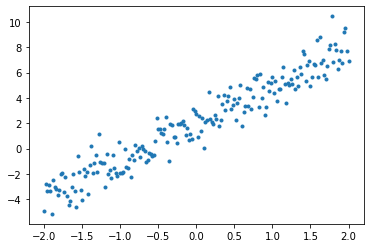

In [5]:
plt.plot(x, y, '.')
plt.show()

In [4]:
model = Model(64)

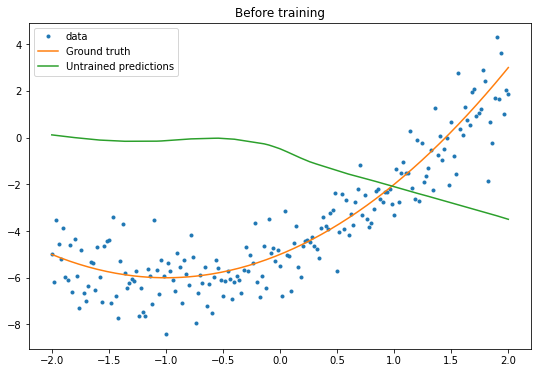

In [5]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x), label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

In [6]:
variables = model.variables

optimizer = tf.optimizers.SGD(learning_rate=0.01)

for step in range(1000):
    with tf.GradientTape() as tape:
        prediction = model(x)
        error = (y - prediction) ** 2
        mean_error = tf.reduce_mean(error)
    gradient = tape.gradient(mean_error, variables)
    optimizer.apply_gradients(zip(gradient, variables))

    if step % 100 == 0:
        print(f'Mean squared error: {mean_error.numpy():0.3f}')

Mean squared error: 21.861
Mean squared error: 1.042
Mean squared error: 1.029
Mean squared error: 1.021
Mean squared error: 1.016
Mean squared error: 1.012
Mean squared error: 1.009
Mean squared error: 1.007
Mean squared error: 1.005
Mean squared error: 1.004


In [2]:
tf.linspace([0., 5.], [10., 40.], 5, axis=0)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 0.  ,  5.  ],
       [ 2.5 , 13.75],
       [ 5.  , 22.5 ],
       [ 7.5 , 31.25],
       [10.  , 40.  ]], dtype=float32)>

In [3]:
tf.linspace([0., 5.], [10., 40.], 5, axis=-1)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[ 0.  ,  2.5 ,  5.  ,  7.5 , 10.  ],
       [ 5.  , 13.75, 22.5 , 31.25, 40.  ]], dtype=float32)>